<img src='https://www.iss.nus.edu.sg/Sitefinity/WebsiteTemplates/ISS/App_Themes/ISS/Images/branding-iss.png' width=15% style="float: right;">
<img src='https://www.iss.nus.edu.sg/Sitefinity/WebsiteTemplates/ISS/App_Themes/ISS/Images/branding-nus.png' width=15% style="float: right;">


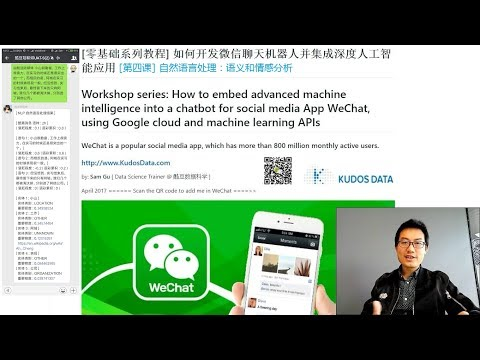

In [1]:
import IPython.display
IPython.display.YouTubeVideo('4m44aPkLY2k')

# 如何使用和开发微信聊天机器人的系列教程
# A workshop to develop & use an intelligent and interactive chat-bot in WeChat

### WeChat is a popular social media app, which has more than 800 million monthly active users.

<img src='https://www.iss.nus.edu.sg/images/default-source/About-Us/7.6.1-teaching-staff/sam-website.tmb-.png' width=8% style="float: right;">
<img src='reference/WeChat_SamGu_QR.png' width=10% style="float: right;">


by: GU Zhan (Sam)


October 2018 : Update to support Python 3 in local machine, e.g. iss-vm.


April 2017 ======= Scan the QR code to become trainer's friend in WeChat =====>>

### 第四课：自然语言处理：语义和情感分析
### Lesson 4: Natural Language Processing 2

* 整篇消息文字的情感分析 (Analyzing Sentiment: perform sentiment analysis)
* 消息文字中语句的情感分析 (Analyzing Entity Sentiment: perform entity sentiment analysis)
* 消息文字中名称实体的识别 (Analyzing Entities: perform entity analysis)
* 语句的语法分析 (Analyzing Syntax: syntactic analysis)
* 消息文字的主题分类 (Classifying Content: analyze content to determine the content category)

### Using Google Cloud Platform's Machine Learning APIs

From the same API console, choose "Dashboard" on the left-hand menu and "Enable API".

Enable the following APIs for your project (search for them) if they are not already enabled:
<ol>
**<li> Google Cloud Natural Language API </li>**
</ol>

Finally, because we are calling the APIs from Python (clients in many other languages are available), let's install the Python package (it's not installed by default on Datalab)

---

## <span style="color:blue">Install the client library</span> for Language Processing

In [2]:
# !pip install --upgrade google-cloud-language

---

In [3]:
# Imports the Google Cloud client library
from google.cloud import language
from google.cloud.language import enums
from google.cloud.language import types

In [4]:
# Imports useful library
import six, sys

In [5]:
# [Optional] Display location of service account API key if defined in GOOGLE_APPLICATION_CREDENTIALS
!echo $GOOGLE_APPLICATION_CREDENTIALS

/media/sf_vm_shared_folder/000-cloud-api-key/mtech-ai-7b7e049cf5f6.json


In [6]:
    
##################################################################
# (1) Instantiates a client - using GOOGLE_APPLICATION_CREDENTIALS
#     client_language = language.LanguageServiceClient()
# 
# (2) Instantiates a client - using 'service account json' file
    client_language = language.LanguageServiceClient.from_service_account_json(
        "/media/sf_vm_shared_folder/000-cloud-api-key/mtech-ai-7b7e049cf5f6.json")
##################################################################


### * 整篇消息文字的情感分析 (Analyzing Sentiment: perform sentiment analysis)

### testimony example

<img src="image/ISS-testimony-sentiment.png">

In [7]:
def didi_sentiment_text(text):    
    # Imports the Google Cloud client library
    from google.cloud import language
    from google.cloud.language import enums
    from google.cloud.language import types
    
##################################################################
# (1) Instantiates a client - using GOOGLE_APPLICATION_CREDENTIALS
#     client_language = language.LanguageServiceClient()
# 
# (2) Instantiates a client - using 'service account json' file
    client_language = language.LanguageServiceClient.from_service_account_json(
        "/media/sf_vm_shared_folder/000-cloud-api-key/mtech-ai-7b7e049cf5f6.json")
##################################################################

    document = types.Document(
        content=text,
        type=enums.Document.Type.PLAIN_TEXT)

    # Detects the sentiment of the text
    sentiment = client_language.analyze_sentiment(document=document).document_sentiment

    print('Text: {}'.format(text))
    print(' ')
    print('Sentiment: {}, {}'.format(sentiment.score, sentiment.magnitude))
    
    return sentiment

In [8]:
text=u'Alvin Khoo: One of the most useful things we learnt at ISS was to be analytical and to be able to adapt, \
       especially in an industry that is changing so quickly. What ISS gave us was an invaluable reference point.'

In [9]:
cloud_response = didi_sentiment_text(text)

Text: Alvin Khoo: One of the most useful things we learnt at ISS was to be analytical and to be able to adapt,        especially in an industry that is changing so quickly. What ISS gave us was an invaluable reference point.
 
Sentiment: 0.8999999761581421, 1.899999976158142


In [10]:
print('[ cloud_response ]\n{}'.format(cloud_response))

[ cloud_response ]
magnitude: 1.899999976158142
score: 0.8999999761581421



### * 消息文字中语句的情感分析 (Analyzing Entity Sentiment: perform entity sentiment analysis)

In [11]:
def didi_entity_sentiment_text(text):
    """Detects entity sentiment in the provided text."""
##################################################################
# (1) Instantiates a client - using GOOGLE_APPLICATION_CREDENTIALS
#     client_language = language.LanguageServiceClient()
# 
# (2) Instantiates a client - using 'service account json' file
    client_language = language.LanguageServiceClient.from_service_account_json(
        "/media/sf_vm_shared_folder/000-cloud-api-key/mtech-ai-7b7e049cf5f6.json")
##################################################################

    if isinstance(text, six.binary_type):
        text = text.decode('utf-8')

    document = types.Document(
        content=text.encode('utf-8'),
        type=enums.Document.Type.PLAIN_TEXT)

    # Detect and send native Python encoding to receive correct word offsets.
    encoding = enums.EncodingType.UTF32
    if sys.maxunicode == 65535:
        encoding = enums.EncodingType.UTF16

    result = client_language.analyze_entity_sentiment(document, encoding)

    for entity in result.entities:
        print('Mentions: ')
        print(u'Name: "{}"'.format(entity.name))
        for mention in entity.mentions:
            print(u'  Begin Offset : {}'.format(mention.text.begin_offset))
            print(u'  Content : {}'.format(mention.text.content))
            print(u'  Magnitude : {}'.format(mention.sentiment.magnitude))
            print(u'  Sentiment : {}'.format(mention.sentiment.score))
            print(u'  Type : {}'.format(mention.type))
        print(u'Salience: {}'.format(entity.salience))
        print(u'Sentiment: {}\n'.format(entity.sentiment))
        
    return result

In [12]:
text=u'Alvin Khoo: One of the most useful things we learnt at ISS was to be analytical and to be able to adapt, \
       especially in an industry that is changing so quickly. What ISS gave us was an invaluable reference point.'

In [13]:
cloud_response = didi_entity_sentiment_text(text)

Mentions: 
Name: "Alvin Khoo"
  Begin Offset : 0
  Content : Alvin Khoo
  Magnitude : 0.20000000298023224
  Sentiment : 0.20000000298023224
  Type : 1
  Begin Offset : 12
  Content : One
  Magnitude : 0.8999999761581421
  Sentiment : 0.8999999761581421
  Type : 2
Salience: 0.6122507452964783
Sentiment: magnitude: 1.2000000476837158
score: 0.6000000238418579


Mentions: 
Name: "industry"
  Begin Offset : 129
  Content : industry
  Magnitude : 0.0
  Sentiment : 0.0
  Type : 2
Salience: 0.1542702317237854
Sentiment: magnitude: 0.699999988079071
score: 0.30000001192092896


Mentions: 
Name: "things"
  Begin Offset : 35
  Content : things
  Magnitude : 0.8999999761581421
  Sentiment : 0.8999999761581421
  Type : 2
Salience: 0.12234412133693695
Sentiment: magnitude: 0.8999999761581421
score: 0.8999999761581421


Mentions: 
Name: "ISS"
  Begin Offset : 55
  Content : ISS
  Magnitude : 0.0
  Sentiment : 0.0
  Type : 1
  Begin Offset : 172
  Content : ISS
  Magnitude : 0.0
  Sentiment : 0.0
  T

In [14]:
print('[ cloud_response ]\n{}'.format(cloud_response))

[ cloud_response ]
entities {
  name: "Alvin Khoo"
  type: PERSON
  salience: 0.6122507452964783
  mentions {
    text {
      content: "Alvin Khoo"
    }
    type: PROPER
    sentiment {
      magnitude: 0.20000000298023224
      score: 0.20000000298023224
    }
  }
  mentions {
    text {
      content: "One"
      begin_offset: 12
    }
    type: COMMON
    sentiment {
      magnitude: 0.8999999761581421
      score: 0.8999999761581421
    }
  }
  sentiment {
    magnitude: 1.2000000476837158
    score: 0.6000000238418579
  }
}
entities {
  name: "industry"
  type: OTHER
  salience: 0.1542702317237854
  mentions {
    text {
      content: "industry"
      begin_offset: 129
    }
    type: COMMON
    sentiment {
    }
  }
  sentiment {
    magnitude: 0.699999988079071
    score: 0.30000001192092896
  }
}
entities {
  name: "things"
  type: OTHER
  salience: 0.12234412133693695
  mentions {
    text {
      content: "things"
      begin_offset: 35
    }
    type: COMMON
    sentiment

### * 消息文字中名称实体的识别 (Analyzing Entities: perform entity analysis)

In [15]:
def didi_entities_text(text):
    """Detects entities in the text."""
##################################################################
# (1) Instantiates a client - using GOOGLE_APPLICATION_CREDENTIALS
#     client_language = language.LanguageServiceClient()
# 
# (2) Instantiates a client - using 'service account json' file
    client_language = language.LanguageServiceClient.from_service_account_json(
        "/media/sf_vm_shared_folder/000-cloud-api-key/mtech-ai-7b7e049cf5f6.json")
##################################################################

    if isinstance(text, six.binary_type):
        text = text.decode('utf-8')

    # Instantiates a plain text document.
    document = types.Document(
        content=text,
        type=enums.Document.Type.PLAIN_TEXT)

    # Detects entities in the document. You can also analyze HTML with:
    #   document.type == enums.Document.Type.HTML
    entities = client_language.analyze_entities(document).entities

    # entity types from enums.Entity.Type
    entity_type = ('UNKNOWN', 'PERSON', 'LOCATION', 'ORGANIZATION',
                   'EVENT', 'WORK_OF_ART', 'CONSUMER_GOOD', 'OTHER')

    for entity in entities:
        print('=' * 20)
        print(u'{:<16}: {}'.format('name', entity.name))
        print(u'{:<16}: {}'.format('type', entity_type[entity.type]))
        print(u'{:<16}: {}'.format('metadata', entity.metadata))
        print(u'{:<16}: {}'.format('salience', entity.salience))
        print(u'{:<16}: {}'.format('wikipedia_url',
              entity.metadata.get('wikipedia_url', '-')))
        
    return entities

In [16]:
text=u'Alvin Khoo: One of the most useful things we learnt at ISS was to be analytical and to be able to adapt, \
       especially in an industry that is changing so quickly. What ISS gave us was an invaluable reference point.'

In [17]:
cloud_response = didi_entities_text(text)

name            : Alvin Khoo
type            : PERSON
metadata        : <google.protobuf.pyext._message.ScalarMapContainer object at 0x7f75dc4ad990>
salience        : 0.6122507452964783
wikipedia_url   : -
name            : industry
type            : OTHER
metadata        : <google.protobuf.pyext._message.ScalarMapContainer object at 0x7f75dc4ad9e0>
salience        : 0.1542702317237854
wikipedia_url   : -
name            : things
type            : OTHER
metadata        : <google.protobuf.pyext._message.ScalarMapContainer object at 0x7f75dc4adbc0>
salience        : 0.12234412133693695
wikipedia_url   : -
name            : ISS
type            : ORGANIZATION
metadata        : <google.protobuf.pyext._message.ScalarMapContainer object at 0x7f75dc4ad300>
salience        : 0.08893194049596786
wikipedia_url   : https://en.wikipedia.org/wiki/International_Space_Station
name            : reference point
type            : OTHER
metadata        : <google.protobuf.pyext._message.ScalarMapContainer 

In [18]:
print('[ cloud_response ]\n{}'.format(cloud_response))

[ cloud_response ]
[name: "Alvin Khoo"
type: PERSON
salience: 0.6122507452964783
mentions {
  text {
    content: "Alvin Khoo"
    begin_offset: -1
  }
  type: PROPER
}
mentions {
  text {
    content: "One"
    begin_offset: -1
  }
  type: COMMON
}
, name: "industry"
type: OTHER
salience: 0.1542702317237854
mentions {
  text {
    content: "industry"
    begin_offset: -1
  }
  type: COMMON
}
, name: "things"
type: OTHER
salience: 0.12234412133693695
mentions {
  text {
    content: "things"
    begin_offset: -1
  }
  type: COMMON
}
, name: "ISS"
type: ORGANIZATION
metadata {
  key: "mid"
  value: "/m/03wky"
}
metadata {
  key: "wikipedia_url"
  value: "https://en.wikipedia.org/wiki/International_Space_Station"
}
salience: 0.08893194049596786
mentions {
  text {
    content: "ISS"
    begin_offset: -1
  }
  type: PROPER
}
mentions {
  text {
    content: "ISS"
    begin_offset: -1
  }
  type: PROPER
}
, name: "reference point"
type: OTHER
salience: 0.022202959284186363
mentions {
  tex

### * 语句的语法分析 (Analyzing Syntax: syntactic analysis)


In [19]:
def didi_syntax_text(text):
    """Detects syntax in the text."""
##################################################################
# (1) Instantiates a client - using GOOGLE_APPLICATION_CREDENTIALS
#     client_language = language.LanguageServiceClient()
# 
# (2) Instantiates a client - using 'service account json' file
    client_language = language.LanguageServiceClient.from_service_account_json(
        "/media/sf_vm_shared_folder/000-cloud-api-key/mtech-ai-7b7e049cf5f6.json")
##################################################################

    if isinstance(text, six.binary_type):
        text = text.decode('utf-8')

    # Instantiates a plain text document.
    document = types.Document(
        content=text,
        type=enums.Document.Type.PLAIN_TEXT)

    # Detects syntax in the document. You can also analyze HTML with:
    #   document.type == enums.Document.Type.HTML
    tokens = client_language.analyze_syntax(document).tokens

    # part-of-speech tags from enums.PartOfSpeech.Tag
    pos_tag = ('UNKNOWN', 'ADJ', 'ADP', 'ADV', 'CONJ', 'DET', 'NOUN', 'NUM',
               'PRON', 'PRT', 'PUNCT', 'VERB', 'X', 'AFFIX')

    for token in tokens:
        print(u'{}: {}'.format(pos_tag[token.part_of_speech.tag],
                               token.text.content))
        
    return tokens


In [20]:
text=u'Alvin Khoo: One of the most useful things we learnt at ISS was to be analytical and to be able to adapt, \
       especially in an industry that is changing so quickly. What ISS gave us was an invaluable reference point.'

In [21]:
cloud_response = didi_syntax_text(text)

NOUN: Alvin
NOUN: Khoo
PUNCT: :
NUM: One
ADP: of
DET: the
ADV: most
ADJ: useful
NOUN: things
PRON: we
VERB: learnt
ADP: at
NOUN: ISS
VERB: was
PRT: to
VERB: be
ADJ: analytical
CONJ: and
PRT: to
VERB: be
ADJ: able
PRT: to
VERB: adapt
PUNCT: ,
ADV: especially
ADP: in
DET: an
NOUN: industry
DET: that
VERB: is
VERB: changing
ADV: so
ADV: quickly
PUNCT: .
PRON: What
NOUN: ISS
VERB: gave
PRON: us
VERB: was
DET: an
ADJ: invaluable
NOUN: reference
NOUN: point
PUNCT: .


In [22]:
print('[ cloud_response ]\n{}'.format(cloud_response))

[ cloud_response ]
[text {
  content: "Alvin"
  begin_offset: -1
}
part_of_speech {
  tag: NOUN
  number: SINGULAR
  proper: PROPER
}
dependency_edge {
  head_token_index: 1
  label: NN
}
lemma: "Alvin"
, text {
  content: "Khoo"
  begin_offset: -1
}
part_of_speech {
  tag: NOUN
  number: SINGULAR
  proper: PROPER
}
dependency_edge {
  head_token_index: 13
  label: NSUBJ
}
lemma: "Khoo"
, text {
  content: ":"
  begin_offset: -1
}
part_of_speech {
  tag: PUNCT
}
dependency_edge {
  head_token_index: 1
  label: P
}
lemma: ":"
, text {
  content: "One"
  begin_offset: -1
}
part_of_speech {
  tag: NUM
}
dependency_edge {
  head_token_index: 1
  label: APPOS
}
lemma: "One"
, text {
  content: "of"
  begin_offset: -1
}
part_of_speech {
  tag: ADP
}
dependency_edge {
  head_token_index: 3
  label: PREP
}
lemma: "of"
, text {
  content: "the"
  begin_offset: -1
}
part_of_speech {
  tag: DET
}
dependency_edge {
  head_token_index: 8
  label: DET
}
lemma: "the"
, text {
  content: "most"
  begi

### * 消息文字的主题分类 (Classifying Content: analyze content to determine the content category)

In [23]:
def didi_classify_text(text):
    """Classifies content categories of the provided text."""
##################################################################
# (1) Instantiates a client - using GOOGLE_APPLICATION_CREDENTIALS
#     client_language = language.LanguageServiceClient()
# 
# (2) Instantiates a client - using 'service account json' file
    client_language = language.LanguageServiceClient.from_service_account_json(
        "/media/sf_vm_shared_folder/000-cloud-api-key/mtech-ai-7b7e049cf5f6.json")
##################################################################

    if isinstance(text, six.binary_type):
        text = text.decode('utf-8')

    document = types.Document(
        content=text.encode('utf-8'),
        type=enums.Document.Type.PLAIN_TEXT)

    categories = client_language.classify_text(document).categories

    for category in categories:
        print(u'=' * 20)
        print(u'{:<16}: {}'.format('name', category.name))
        print(u'{:<16}: {}'.format('confidence', category.confidence))
        
    return categories

In [24]:
text=u'Alvin Khoo: One of the most useful things we learnt at ISS was to be analytical and to be able to adapt, \
       especially in an industry that is changing so quickly. What ISS gave us was an invaluable reference point.'

In [25]:
cloud_response = didi_classify_text(text)

In [26]:
print('[ cloud_response ]\n{}'.format(cloud_response))

[ cloud_response ]
[]


In [27]:
text=u'GU Zhan (Sam) lectures Master of Technology programme in the areas of data science, machine intelligence, \
       soft computing, and applied deep learning. Prior to joining ISS, he was in New Zealand running Kudos Data \
       start-up, which focussed on training programs to democratize artificial intelligence and machine learning. \
       Before that, he was a data scientist in Yokogawa Engineering, leading industrial innovation initiatives. \
       Sam had also spent many years in financial sector wearing versatile hats: project manager, consultant, \
       and business analyst in Barclays bank, system manager and senior software engineer at Citibank, leading \
       to experience in actualizing information technology values in complex business environment. \
       He devotes himself into pedagogy, and is very passionate in inspiring next generation of \
       artificial intelligence lovers and leaders.'

In [28]:
cloud_response = didi_classify_text(text)

name            : /Jobs & Education/Education
confidence      : 0.75
name            : /Science/Computer Science
confidence      : 0.6800000071525574
name            : /Science/Engineering & Technology
confidence      : 0.550000011920929


In [29]:
print('[ cloud_response ]\n{}'.format(cloud_response))

[ cloud_response ]
[name: "/Jobs & Education/Education"
confidence: 0.75
, name: "/Science/Computer Science"
confidence: 0.6800000071525574
, name: "/Science/Engineering & Technology"
confidence: 0.550000011920929
]


## <span style="color:blue">Wrap cloud APIs into Functions() for conversational virtual assistant (VA):</span>
Reuse above defined Functions().

In [30]:
def didi_language_processing(text):
    nlp_reply  = u'[ NLP 自然语言处理结果 ]\n\n'
    nlp_reply += u'[ didi_sentiment_text ]\n\n' + str(didi_sentiment_text(text)) + u'\n\n'
    nlp_reply += u'[ didi_entity_sentiment_text ]\n\n' + str(didi_entity_sentiment_text(text)) + u'\n\n'
    nlp_reply += u'[ didi_entities_text ]\n\n' + str(didi_entities_text(text)) + u'\n\n'
    nlp_reply += u'[ didi_syntax_text ]\n\n' + str(didi_syntax_text(text)) + u'\n\n'
    nlp_reply += u'[ didi_classify_text ]\n\n' + str(didi_classify_text(text)) + u'\n\n'
    
    return nlp_reply

In [31]:
demo_text = 'Sam devotes himself into pedagogy, and is very passionate in inspiring next generation of \
artificial intelligence lovers and leaders.'

demo_nlp_reply = didi_language_processing(demo_text)

Text: Sam devotes himself into pedagogy, and is very passionate in inspiring next generation of artificial intelligence lovers and leaders.
 
Sentiment: 0.8999999761581421, 0.8999999761581421
Mentions: 
Name: "Sam"
  Begin Offset : 0
  Content : Sam
  Magnitude : 0.10000000149011612
  Sentiment : 0.10000000149011612
  Type : 1
Salience: 0.6262403726577759
Sentiment: magnitude: 0.10000000149011612


Mentions: 
Name: "pedagogy"
  Begin Offset : 25
  Content : pedagogy
  Magnitude : 0.0
  Sentiment : 0.0
  Type : 2
Salience: 0.12771210074424744
Sentiment: 

Mentions: 
Name: "generation"
  Begin Offset : 76
  Content : generation
  Magnitude : 0.0
  Sentiment : 0.0
  Type : 2
Salience: 0.07457112520933151
Sentiment: 

Mentions: 
Name: "lovers"
  Begin Offset : 114
  Content : lovers
  Magnitude : 0.10000000149011612
  Sentiment : 0.10000000149011612
  Type : 2
Salience: 0.0632929727435112
Sentiment: magnitude: 0.10000000149011612
score: 0.10000000149011612


Mentions: 
Name: "artificial in

In [32]:
print(demo_nlp_reply)

[ NLP 自然语言处理结果 ]

[ didi_sentiment_text ]

magnitude: 0.8999999761581421
score: 0.8999999761581421


[ didi_entity_sentiment_text ]

entities {
  name: "Sam"
  type: PERSON
  salience: 0.6262403726577759
  mentions {
    text {
      content: "Sam"
    }
    type: PROPER
    sentiment {
      magnitude: 0.10000000149011612
      score: 0.10000000149011612
    }
  }
  sentiment {
    magnitude: 0.10000000149011612
  }
}
entities {
  name: "pedagogy"
  type: OTHER
  salience: 0.12771210074424744
  mentions {
    text {
      content: "pedagogy"
      begin_offset: 25
    }
    type: COMMON
    sentiment {
    }
  }
  sentiment {
  }
}
entities {
  name: "generation"
  type: OTHER
  salience: 0.07457112520933151
  mentions {
    text {
      content: "generation"
      begin_offset: 76
    }
    type: COMMON
    sentiment {
    }
  }
  sentiment {
  }
}
entities {
  name: "lovers"
  type: PERSON
  salience: 0.0632929727435112
  mentions {
    text {
      content: "lovers"
      begin_off

In [33]:
# Comment some API which does not support Chinese language:
def didi_language_processing_chinese(text):
    nlp_reply  = u'[ NLP 自然语言处理结果 ]\n\n'
    nlp_reply += u'[ didi_sentiment_text ]\n\n' + str(didi_sentiment_text(text)) + u'\n\n'
#     nlp_reply += u'[ didi_entity_sentiment_text ]\n\n' + str(didi_entity_sentiment_text(text)) + u'\n\n'
    nlp_reply += u'[ didi_entities_text ]\n\n' + str(didi_entities_text(text)) + u'\n\n'
    nlp_reply += u'[ didi_syntax_text ]\n\n' + str(didi_syntax_text(text)) + u'\n\n'
#     nlp_reply += u'[ didi_classify_text ]\n\n' + str(didi_classify_text(text)) + u'\n\n'
    
    return nlp_reply

In [34]:
demo_text = '山姆致力于教育学，并且非常热衷于激励下一代人工智能爱好者和领导者。'

demo_nlp_reply = didi_language_processing_chinese(demo_text)

Text: 山姆致力于教育学，并且非常热衷于激励下一代人工智能爱好者和领导者。
 
Sentiment: 0.30000001192092896, 0.30000001192092896
name            : 山姆
type            : PERSON
metadata        : <google.protobuf.pyext._message.ScalarMapContainer object at 0x7f75dc459ee0>
salience        : 0.43622928857803345
wikipedia_url   : -
name            : 教育学
type            : OTHER
metadata        : <google.protobuf.pyext._message.ScalarMapContainer object at 0x7f75dc459f30>
salience        : 0.29734984040260315
wikipedia_url   : -
name            : 领导者
type            : PERSON
metadata        : <google.protobuf.pyext._message.ScalarMapContainer object at 0x7f75dc459cb0>
salience        : 0.13476282358169556
wikipedia_url   : -
name            : 智能爱好者
type            : PERSON
metadata        : <google.protobuf.pyext._message.ScalarMapContainer object at 0x7f75dc459d50>
salience        : 0.13165807723999023
wikipedia_url   : -
NOUN: 山姆
VERB: 致力
VERB: 于
NOUN: 教育
AFFIX: 学
PUNCT: ，
ADV: 并且
ADV: 非常
VERB: 热衷
VERB: 于
VERB: 激励
ADP: 下
NUM:

In [35]:
print(demo_nlp_reply)

[ NLP 自然语言处理结果 ]

[ didi_sentiment_text ]

magnitude: 0.30000001192092896
score: 0.30000001192092896


[ didi_entities_text ]

[name: "\345\261\261\345\247\206"
type: PERSON
salience: 0.43622928857803345
mentions {
  text {
    content: "\345\261\261\345\247\206"
    begin_offset: -1
  }
  type: PROPER
}
, name: "\346\225\231\350\202\262\345\255\246"
type: OTHER
salience: 0.29734984040260315
mentions {
  text {
    content: "\346\225\231\350\202\262\345\255\246"
    begin_offset: -1
  }
  type: COMMON
}
, name: "\351\242\206\345\257\274\350\200\205"
type: PERSON
salience: 0.13476282358169556
mentions {
  text {
    content: "\351\242\206\345\257\274\350\200\205"
    begin_offset: -1
  }
  type: COMMON
}
, name: "\346\231\272\350\203\275\347\210\261\345\245\275\350\200\205"
type: PERSON
salience: 0.13165807723999023
mentions {
  text {
    content: "\346\231\272\350\203\275\347\210\261\345\245\275\350\200\205"
    begin_offset: -1
  }
  type: COMMON
}
]

[ didi_syntax_text ]

[text {
  

## <span style="color:blue">Start interactive conversational virtual assistant (VA):</span>

### Import ItChat, etc. 导入需要用到的一些功能程序库：

In [36]:
# import io, os, subprocess, sys, re, codecs, time, datetime, requests, itchat
import itchat
from itchat.content import *

### Log in using QR code image / 用微信App扫QR码图片来自动登录

In [37]:
# itchat.auto_login(hotReload=True) # hotReload=True: 退出程序后暂存登陆状态。即使程序关闭，一定时间内重新开启也可以不用重新扫码。
itchat.auto_login(enableCmdQR=-2) # enableCmdQR=-2: 命令行显示QR图片

Getting uuid of QR code.


                                                                              
  ██████████████  ██  ██████  ████  ██    ██    ██████████    ██████████████  
  ██          ██        ██      ██  ████  ██    ██████████    ██          ██  
  ██  ██████  ██      ██  ██  ██  ██  ████████        ██  ██  ██  ██████  ██  
  ██  ██████  ██  ████    ████    ██  ██████    ████          ██  ██████  ██  
  ██  ██████  ██      ██    ██  ██  ████  ██████    ████████  ██  ██████  ██  
  ██          ██    ██  ████  ██  ██████    ██  ████████████  ██          ██  
  ██████████████  ██  ██  ██  ██  ██  ██  ██  ██  ██  ██  ██  ██████████████  
                        ████      ██████████    ██  ████  ██                  
      ██  ██████  ██  ████    ████        ████████████████  ██      ██    ██  
  ██████████        ██████████    ██  ████      ██    ██      ██          ██  
    ██  ████  ██  ████    ██  ██  ██████        ██  ██        ██  ██  ██████  
  ██                ██  ████      ██          ██████

Please scan the QR code to log in.
Please press confirm on your phone.
Loading the contact, this may take a little while.
Login successfully as 白黑


In [38]:
# Obtain my own Nick Name
MySelf = itchat.search_friends()
NickName4RegEx = '@' + MySelf['NickName'] + '\s*'

In [39]:
# 单聊模式，自动进行自然语言分析，以文本形式返回处理结果：
@itchat.msg_register([TEXT, MAP, CARD, NOTE, SHARING])
def text_reply(msg):
        text = msg['Content']
        # call NLP API:
        nlp_responses = didi_language_processing(text)
#         nlp_responses = didi_language_processing_chinese(text)
        # Format NLP results: 
        nlp_reply = nlp_responses # Exercise / Workshop Enhancement: to parse and format results nicely.
        print(nlp_reply)
        return nlp_reply

In [40]:
# 群聊模式，如果收到 @ 自己的文字信息，会自动进行自然语言分析，以文本形式返回处理结果：
@itchat.msg_register(TEXT, isGroupChat=True)
def text_reply(msg):
    if msg['isAt']:
        text = re.sub(NickName4RegEx, '', msg['Content'])
        # call NLP API:
        nlp_responses = didi_language_processing(text)
#         nlp_responses = didi_language_processing_chinese(text)
        # Format NLP results:
        nlp_reply = nlp_responses # Exercise / Workshop Enhancement: to parse and format results nicely.
        print(nlp_reply)
        return nlp_reply

In [41]:
itchat.run()

Start auto replying.


Text: I am in sentiment analysis course today at ISS NUS. 
 
Sentiment: 0.4000000059604645, 0.4000000059604645
Mentions: 
Name: "sentiment analysis course"
  Begin Offset : 8
  Content : sentiment analysis course
  Magnitude : 0.0
  Sentiment : 0.0
  Type : 2
Salience: 0.6935411095619202
Sentiment: 

Mentions: 
Name: "ISS NUS"
  Begin Offset : 43
  Content : ISS NUS
  Magnitude : 0.0
  Sentiment : 0.0
  Type : 1
Salience: 0.30645889043807983
Sentiment: 

name            : sentiment analysis course
type            : OTHER
metadata        : <google.protobuf.pyext._message.ScalarMapContainer object at 0x7f75fcdbe990>
salience        : 0.6935411095619202
wikipedia_url   : -
name            : ISS NUS
type            : OTHER
metadata        : <google.protobuf.pyext._message.ScalarMapContainer object at 0x7f75dc130da0>
salience        : 0.30645889043807983
wikipedia_url   : -
PRON: I
VERB: am
ADP: in
NOUN: sentiment
NOUN: analysis
NOUN: course
NOUN: today
ADP: at
NOUN: ISS
NOUN: NUS
PUNCT: .


Traceback (most recent call last):
  File "/home/iss-user/anaconda3/envs/iss-env-py3/lib/python3.6/site-packages/google/api_core/grpc_helpers.py", line 59, in error_remapped_callable
    return callable_(*args, **kwargs)
  File "/home/iss-user/anaconda3/envs/iss-env-py3/lib/python3.6/site-packages/grpc/_channel.py", line 487, in __call__
    return _end_unary_response_blocking(state, call, False, deadline)
  File "/home/iss-user/anaconda3/envs/iss-env-py3/lib/python3.6/site-packages/grpc/_channel.py", line 437, in _end_unary_response_blocking
    raise _Rendezvous(state, None, None, deadline)
grpc._channel._Rendezvous: <_Rendezvous of RPC that terminated with (StatusCode.INVALID_ARGUMENT, Invalid text content: too few tokens (words) to process.)>

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/home/iss-user/anaconda3/envs/iss-env-py3/lib/python3.6/site-packages/itchat/components/register.py", line 60, in configured_repl

Text: Sam devotes himself into pedagogy, and is very passionate in inspiring next generation of artificial intelligence lovers and leaders.
 
Sentiment: 0.8999999761581421, 0.8999999761581421
Mentions: 
Name: "Sam"
  Begin Offset : 0
  Content : Sam
  Magnitude : 0.10000000149011612
  Sentiment : 0.10000000149011612
  Type : 1
Salience: 0.6262403726577759
Sentiment: magnitude: 0.10000000149011612


Mentions: 
Name: "pedagogy"
  Begin Offset : 25
  Content : pedagogy
  Magnitude : 0.0
  Sentiment : 0.0
  Type : 2
Salience: 0.12771210074424744
Sentiment: 

Mentions: 
Name: "generation"
  Begin Offset : 76
  Content : generation
  Magnitude : 0.0
  Sentiment : 0.0
  Type : 2
Salience: 0.07457112520933151
Sentiment: 

Mentions: 
Name: "lovers"
  Begin Offset : 114
  Content : lovers
  Magnitude : 0.10000000149011612
  Sentiment : 0.10000000149011612
  Type : 2
Salience: 0.0632929727435112
Sentiment: magnitude: 0.10000000149011612
score: 0.10000000149011612


Mentions: 
Name: "artificial in

Bye~


In [42]:
# interupt kernel, then logout
itchat.logout() # 安全退出

<ItchatReturnValue: {'BaseResponse': {'ErrMsg': '请求成功', 'Ret': 0, 'RawMsg': 'logout successfully.'}}>

### 第四课：自然语言处理：语义和情感分析
### Lesson 4: Natural Language Processing 2

* 整篇消息文字的情感分析 (Analyzing Sentiment: perform sentiment analysis)
* 消息文字中语句的情感分析 (Analyzing Entity Sentiment: perform entity sentiment analysis)
* 消息文字中名称实体的识别 (Analyzing Entities: perform entity analysis)
* 语句的语法分析 (Analyzing Syntax: syntactic analysis)
* 消息文字的主题分类 (Classifying Content: analyze content to determine the content category)

### 下一课是:
### 第五课：视频识别和处理
### Lesson 5: Video Recognition & Processing
* 识别视频消息中的物体名字 (Recognize objects in video)
* 识别视频的场景 (Detect scenery in video)
* 直接搜索视频内容 (Search content in video)

<img src='reference/WeChat_SamGu_QR.png' width=80% style="float: left;">


---